Step 1: Upload the Dataset

We'll begin by uploading the `house_prices.csv` file using Google Colab's file upload feature. This will allow us to load the dataset directly into our environment for analysis.


In [2]:
from google.colab import files

# Prompt user to upload the file
uploaded = files.upload()


Saving house_prices.csv to house_prices.csv


## Step 2: Load the Dataset

After uploading, we will read the CSV file into a Pandas DataFrame and display the first few rows to understand the structure of the data.


In [3]:
import pandas as pd

# Replace with your uploaded filename if different
df = pd.read_csv('house_prices.csv')

# Display the first five rows
df.head()


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


Step 3: Check for Missing Values

Before applying any cleaning steps, it's essential to inspect the dataset for missing values. This helps us decide whether to drop, fill, or otherwise handle the missing data. We will display:
- Total number of missing values per column
- Percentage of missing values to evaluate impact


In [4]:
# Count missing values
missing_count = df.isnull().sum()

# Calculate percentage of missing values
missing_percent = (missing_count / len(df)) * 100

# Combine both into a summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percent Missing (%)': missing_percent
})

# Filter only columns with missing data
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary.sort_values(by='Percent Missing (%)', ascending=False)


,Missing Values,Percent Missing (%)
Plot Area,187531,100.000000
Dimensions,187531,100.000000
Society,109678,58.485264
Super Area,107685,57.422506
Car Parking,103357,55.114621
overlooking,81436,43.425354
Carpet Area,80673,43.018488
facing,70233,37.451408
Ownership,65517,34.936624
Balcony,48935,26.094352


We analyzed missing values and took action based on the percentage of missing data and the importance of each column.

Step 4: Clean the Dataset

Based on the missing values summary, we will:
- Drop columns with 100% missing values (`Plot Area`, `Dimensions`)
- Drop rows where the target variable (`Price (in rupees)`) is missing
- Fill remaining numeric columns with median
- Fill categorical columns with mode


In [5]:
# Drop columns with 100% missing data
df.drop(columns=['Plot Area', 'Dimensions'], inplace=True)

# Drop rows where target is missing
df = df.dropna(subset=['Price (in rupees)'])

# Identify columns by data type
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing numeric columns with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Data cleaning complete.")


<ipython-input-5-cef21b4de007>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-5-cef21b4de007>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)


✅ Data cleaning complete.


In [6]:
df.isnull().sum().sum()


np.int64(0)

Step 5: Encode Categorical Variables

To prepare the dataset for machine learning models, we need to convert all categorical variables into numeric format. We will use `Label Encoding` for this, which replaces each unique category with an integer value.

This is suitable when:
- We don’t need to preserve category hierarchy.
- We want to reduce dimensionality (compared to one-hot encoding).

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Identify object (categorical) columns again
cat_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("✅ All categorical variables encoded.")



✅ All categorical variables encoded.


Step 6: Exploratory Data Analysis (EDA)
We'll now build several visuals to understand:

Feature distributions

Correlation patterns

Feature vs. target relationships

A full dataset overview

Step 6.1: Distribution of House Prices

We'll visualize the distribution of the target variable `Price (in rupees)` using a histogram and a KDE (Kernel Density Estimation) curve. This helps identify the spread, skewness, and presence of outliers.


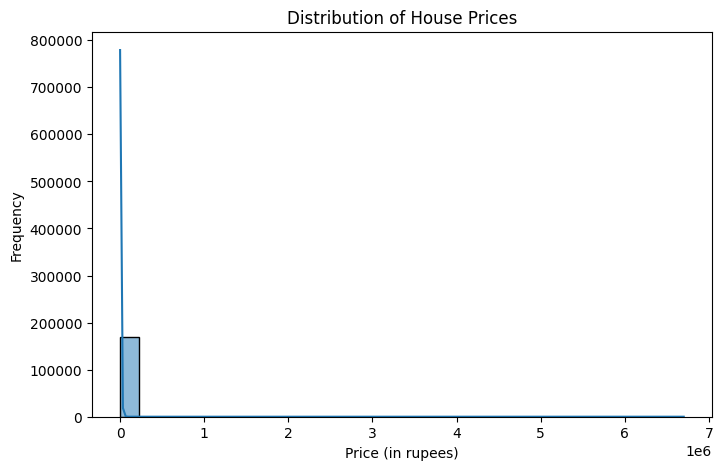

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Price (in rupees)'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in rupees)')
plt.ylabel('Frequency')
plt.show()


### Step 6.2: Correlation Heatmap

A heatmap helps visualize how features correlate with each other and with the target (`Price (in rupees)`). High correlation may indicate a strong predictive relationship.


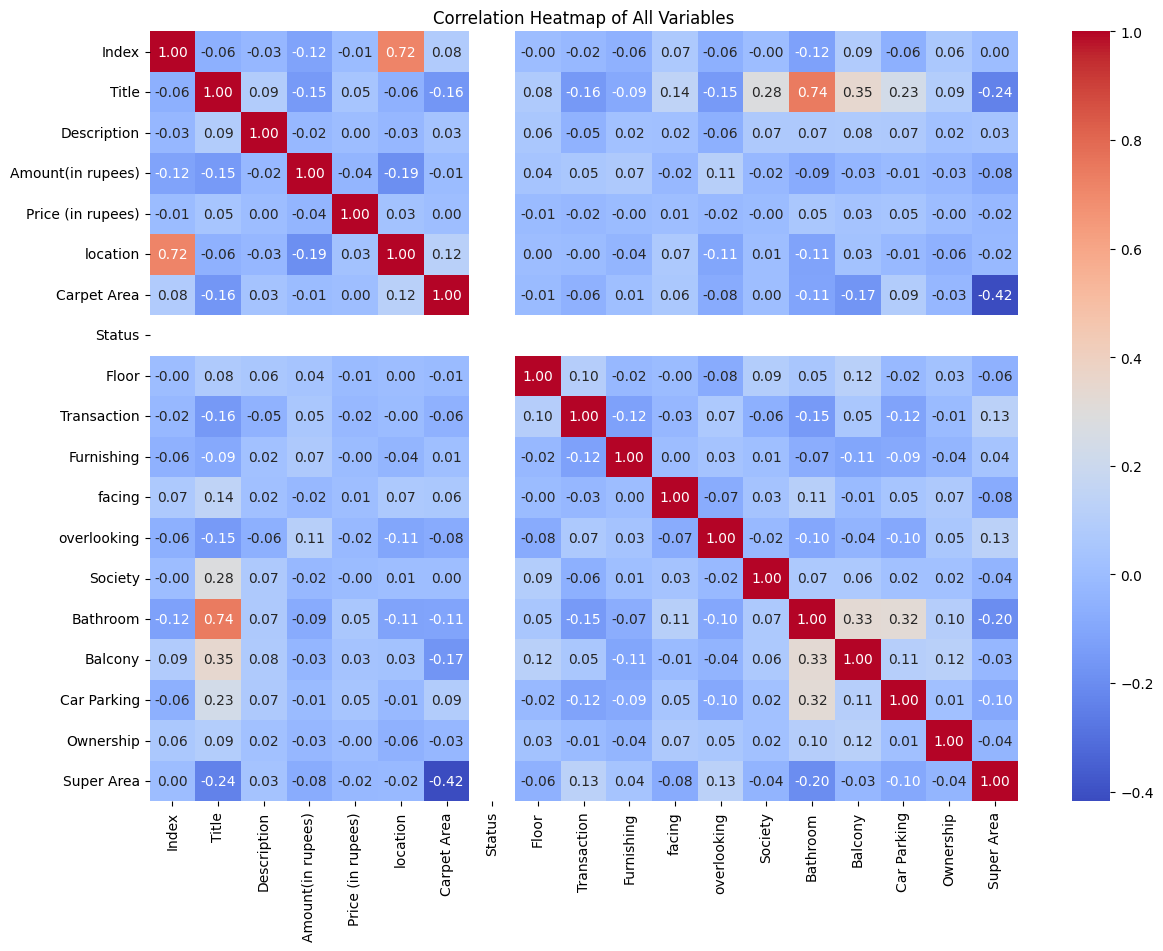

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Variables")
plt.show()


### Step 6.3: Boxplots of Features vs Price

Boxplots show how different values of specific features influence house prices. We'll visualize:
- Carpet Area
- Bathroom Count
- Balcony Count
- Car Parking Availability


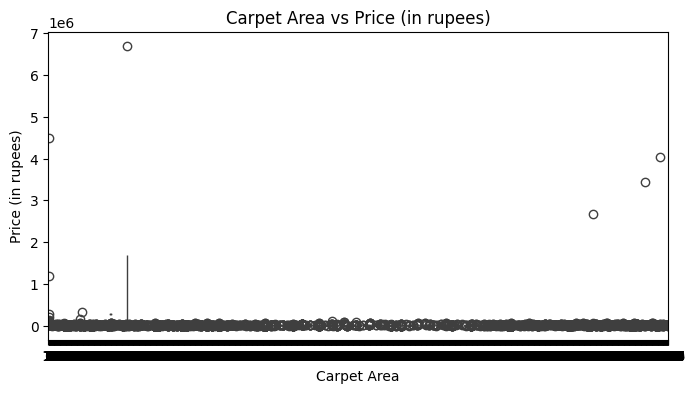

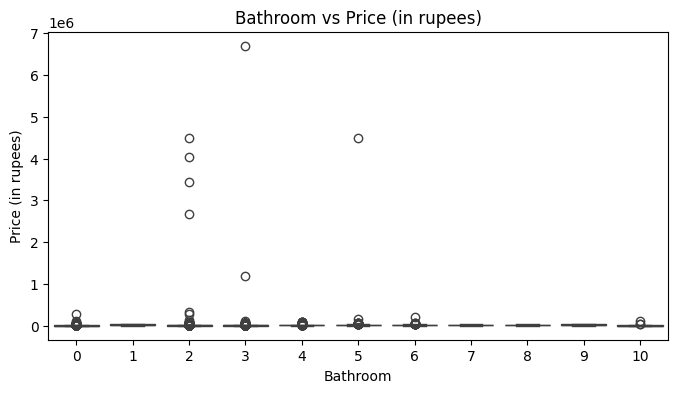

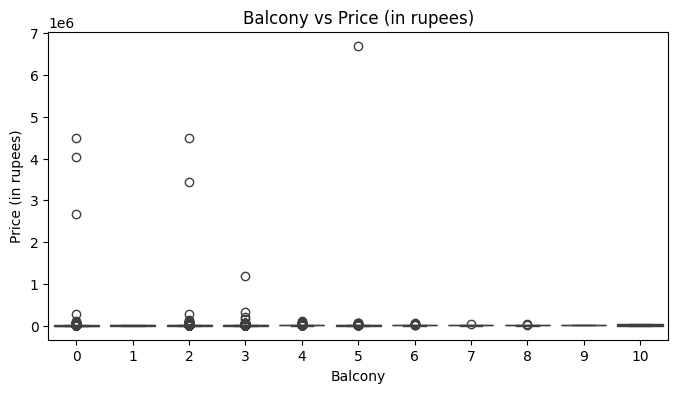

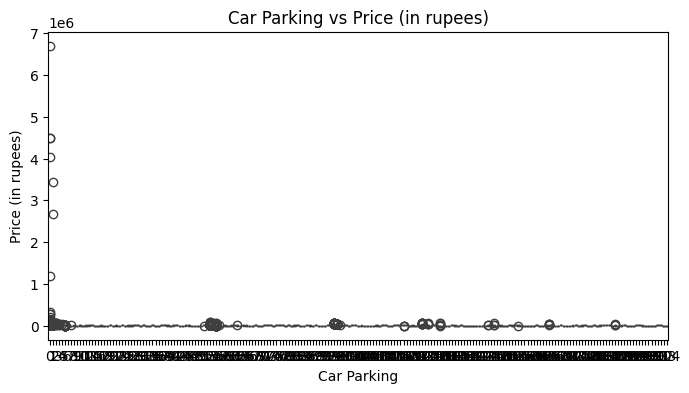

In [10]:
features = ['Carpet Area', 'Bathroom', 'Balcony', 'Car Parking']

for col in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], y=df['Price (in rupees)'])
    plt.title(f'{col} vs Price (in rupees)')
    plt.xlabel(col)
    plt.ylabel('Price (in rupees)')
    plt.show()


### Step 6.4: Pairplot of Key Numerical Features

A pairplot allows us to visualize pairwise relationships between selected numeric variables. This is helpful to detect trends, groupings, or linear/nonlinear patterns.


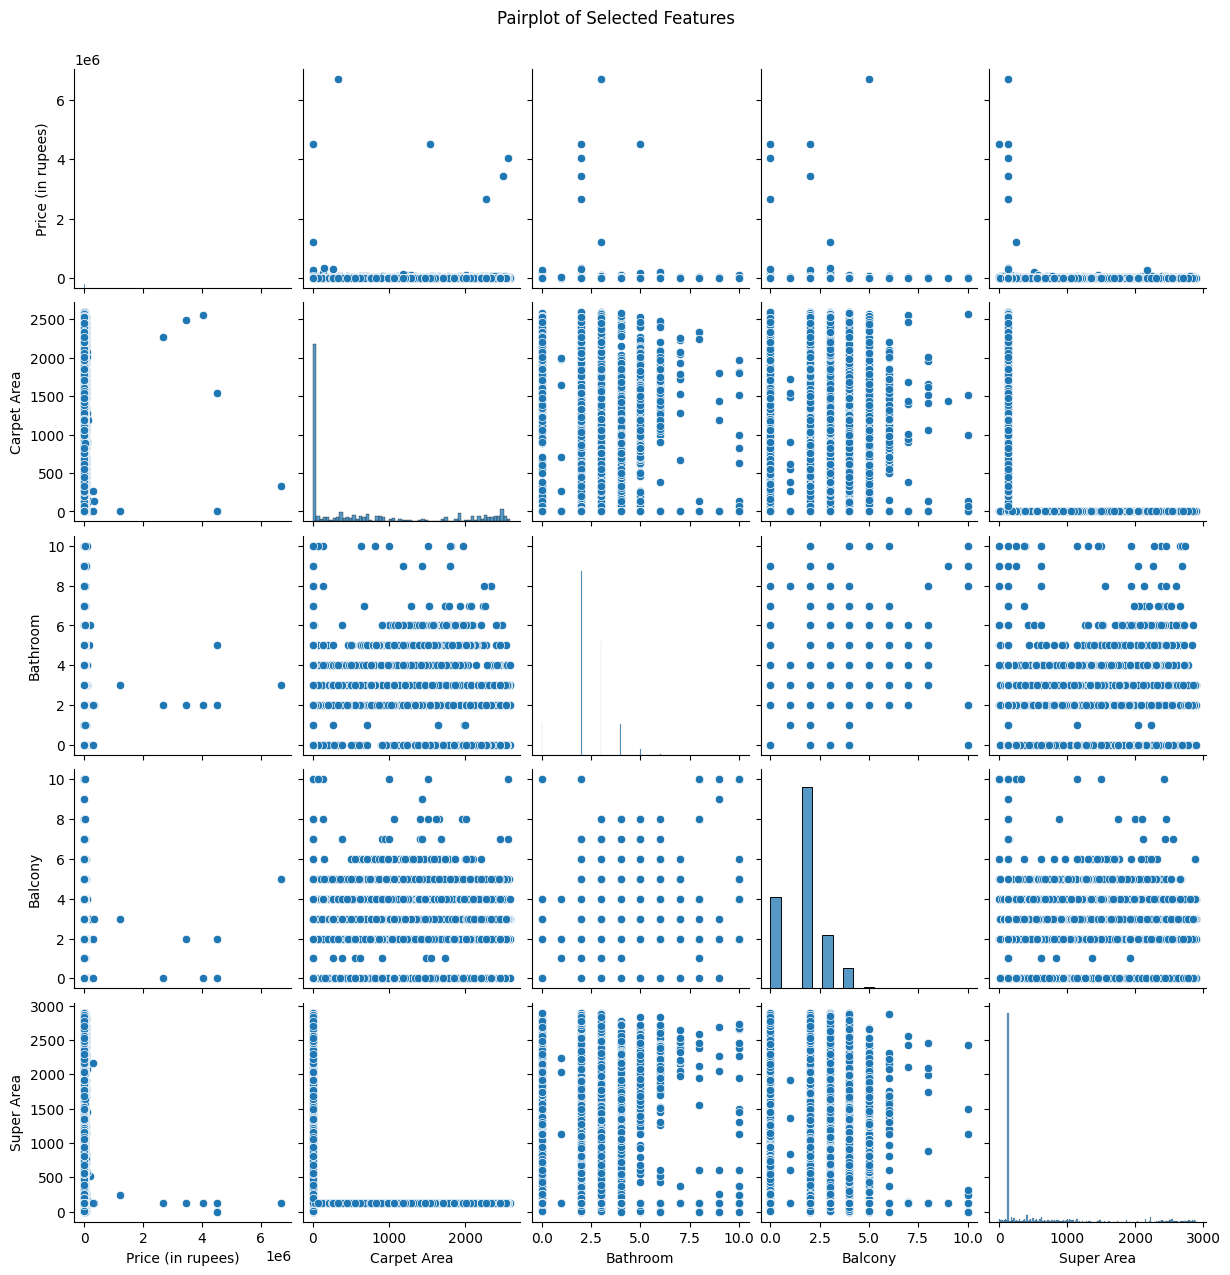

In [11]:
selected = ['Price (in rupees)', 'Carpet Area', 'Bathroom', 'Balcony', 'Super Area']
sns.pairplot(df[selected])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


### Step 6.5: Combined Histograms of All Numeric Features

To get a quick overview of the distribution of all numeric variables, we plot them together in a single figure using subplots.


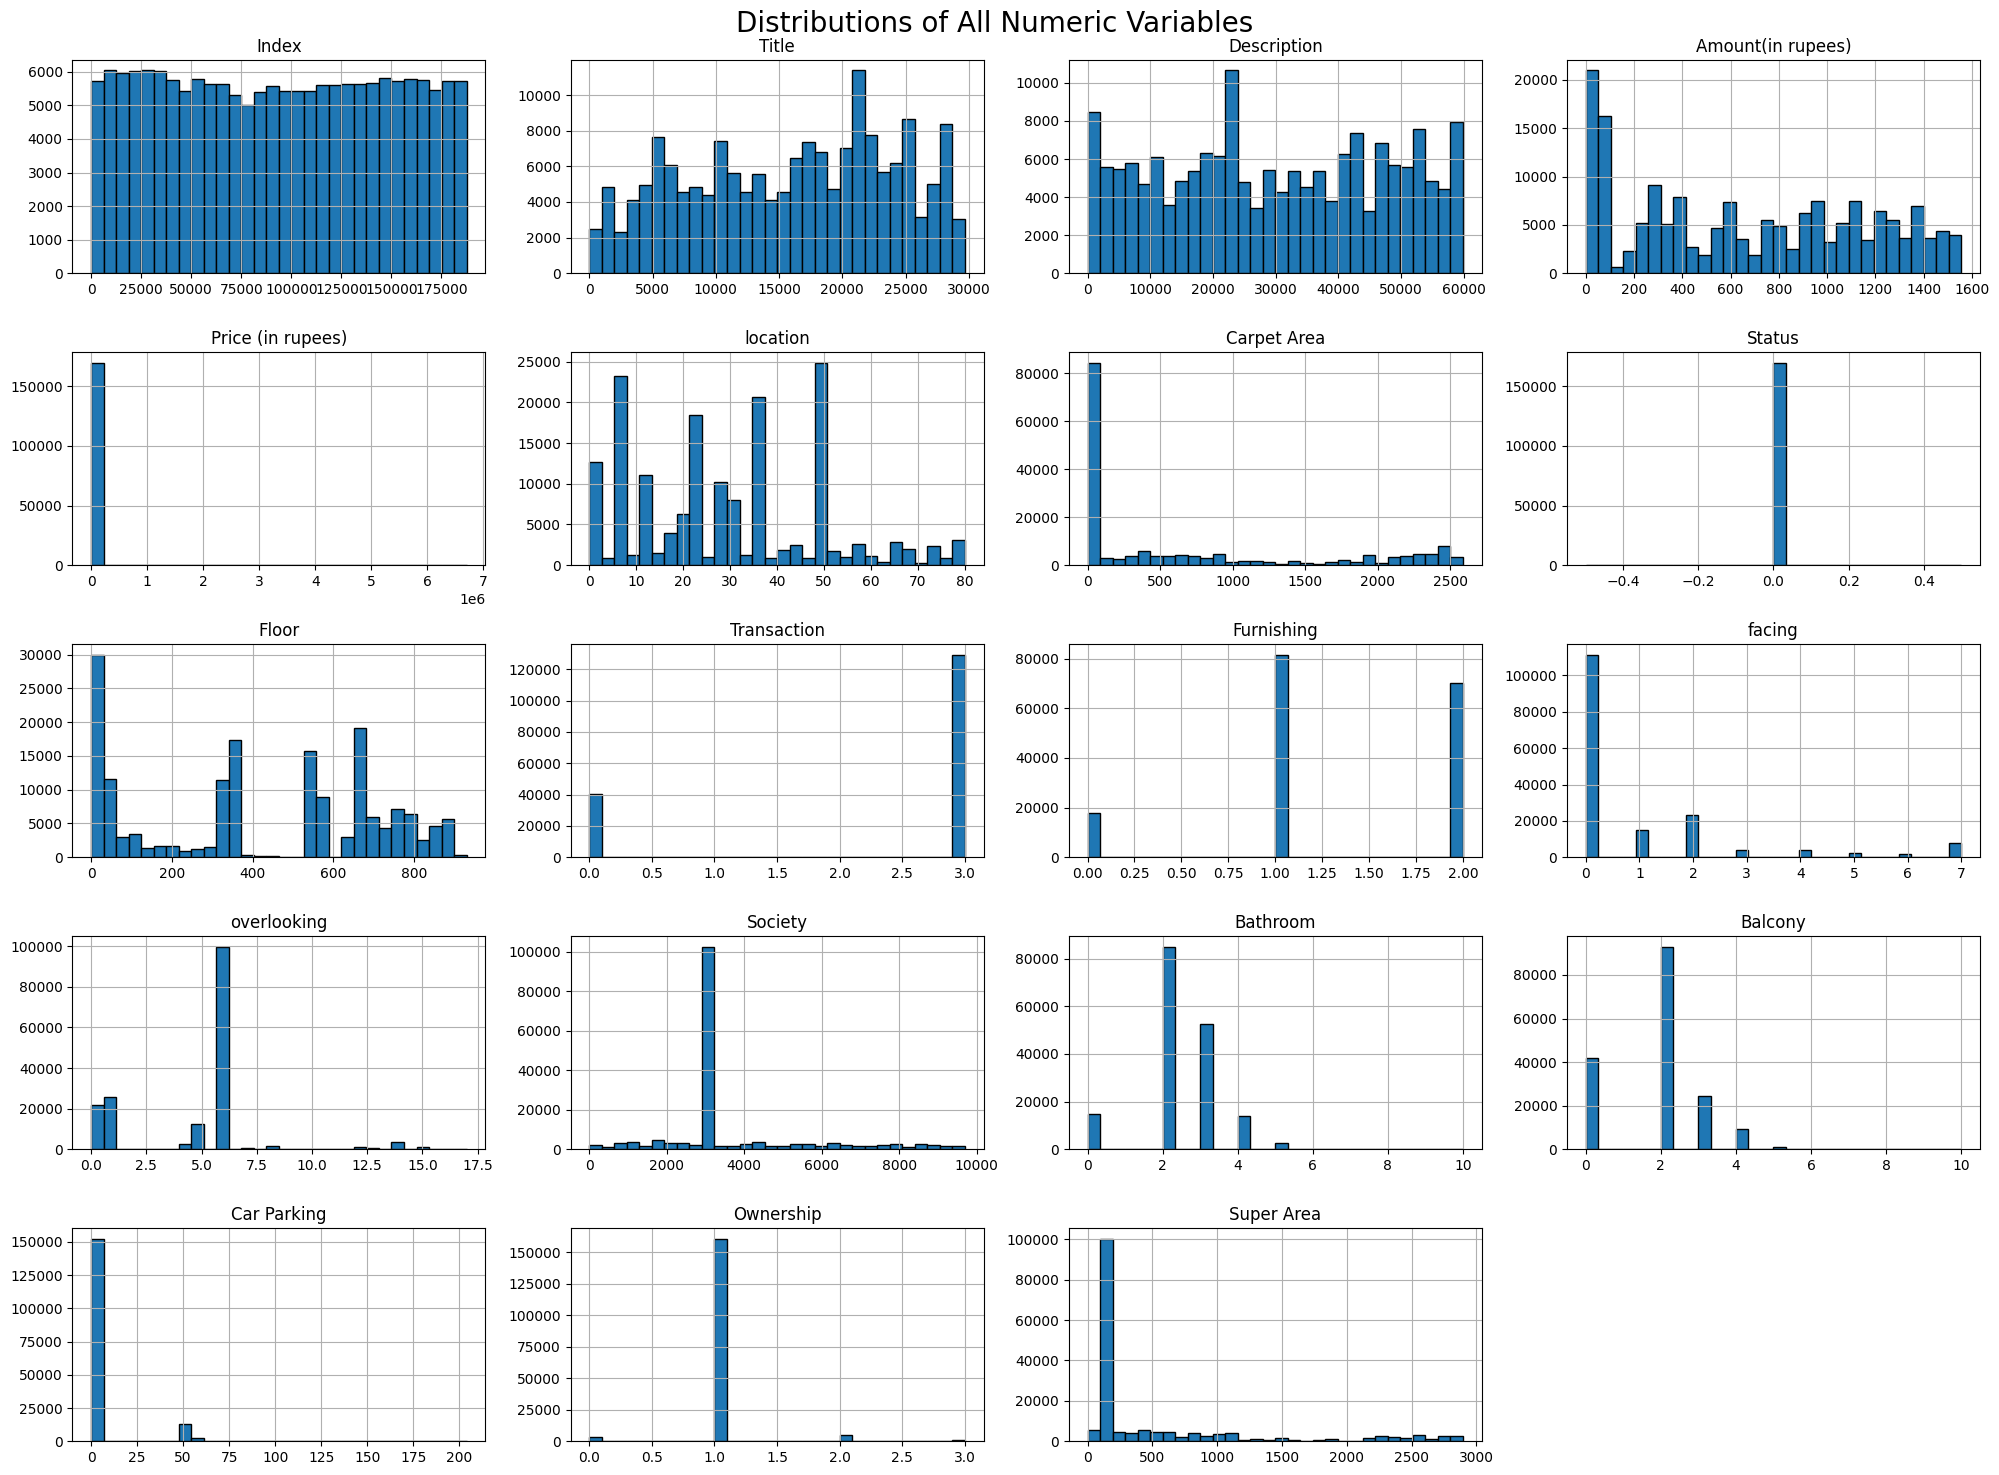

In [12]:
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Distributions of All Numeric Variables", fontsize=20)
plt.tight_layout()
plt.show()


Step 7: Training & Model Building

Step 7.1: Split the Data into Train and Test Sets

We will split the dataset into features (`X`) and target variable (`y`), and then divide it into 80% training and 20% testing sets for model validation.


In [13]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop(columns=['Price (in rupees)'])
y = df['Price (in rupees)']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split into train and test sets.")


✅ Data split into train and test sets.


### Step 7.2: Model 1: Linear Regression

Linear Regression assumes a straight-line relationship between features and the target. It’s a great baseline model for comparison.


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluation Metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression MAE: {lr_mae:.2f}")
print(f"Linear Regression R² Score: {lr_r2:.4f}")


Linear Regression MSE: 1972067003.71
Linear Regression RMSE: 44407.96
Linear Regression MAE: 3183.40
Linear Regression R² Score: 0.0034


Step 7.3: Model 2: Polynomial Regression (Degree 2)

Polynomial Regression transforms the input features into polynomial combinations, allowing the model to capture non-linear relationships. Degree 2 is used here to balance complexity and performance.


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)

# Evaluation Metrics
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

print(f"Polynomial Regression MSE: {poly_mse:.2f}")
print(f"Polynomial Regression RMSE: {poly_rmse:.2f}")
print(f"Polynomial Regression MAE: {poly_mae:.2f}")
print(f"Polynomial Regression R² Score: {poly_r2:.4f}")


Polynomial Regression MSE: 1970632324.11
Polynomial Regression RMSE: 44391.80
Polynomial Regression MAE: 2777.54
Polynomial Regression R² Score: 0.0041


Step 7.4: Model 3: Ridge Regression

Ridge Regression applies L2 regularization to reduce overfitting by penalizing large coefficients. It's especially helpful when multicollinearity is present in the data.


In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Evaluation Metrics
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Ridge Regression MAE: {ridge_mae:.2f}")
print(f"Ridge Regression R² Score: {ridge_r2:.4f}")


Ridge Regression MSE: 1972067009.22
Ridge Regression RMSE: 44407.96
Ridge Regression MAE: 3183.40
Ridge Regression R² Score: 0.0034


Step 7.5: Model 4: Lasso Regression

Lasso Regression adds L1 regularization, which can shrink some coefficients to zero. This makes it useful for automatic feature selection and reducing model complexity.


In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Evaluation Metrics
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Lasso Regression MSE: {lasso_mse:.2f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")
print(f"Lasso Regression MAE: {lasso_mae:.2f}")
print(f"Lasso Regression R² Score: {lasso_r2:.4f}")


Lasso Regression MSE: 1972067347.99
Lasso Regression RMSE: 44407.96
Lasso Regression MAE: 3183.49
Lasso Regression R² Score: 0.0034


Model Performance Comparison Table

This table summarizes all evaluation metrics (MSE, RMSE, MAE, R²) across the four regression models to help identify the best-performing one.


In [19]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [lr_mse, poly_mse, ridge_mse, lasso_mse],
    'RMSE': [lr_rmse, poly_rmse, ridge_rmse, lasso_rmse],
    'MAE': [lr_mae, poly_mae, ridge_mae, lasso_mae],
    'R2 Score': [lr_r2, poly_r2, ridge_r2, lasso_r2]
})

results.sort_values(by='RMSE', ascending=True)


,Model,MSE,RMSE,MAE,R2 Score
1,Polynomial Regression,1.970632e+09,44391.804695,2777.543792,0.004105
0,Linear Regression,1.972067e+09,44407.961040,3183.402637,0.003380
2,Ridge Regression,1.972067e+09,44407.961102,3183.402644,0.003380
3,Lasso Regression,1.972067e+09,44407.964916,3183.489150,0.003379


### Residual Plot

This plot displays the residuals (prediction errors) of the model. A good model will have residuals randomly scattered around zero without any clear pattern. Non-random patterns may suggest problems like non-linearity or heteroscedasticity.


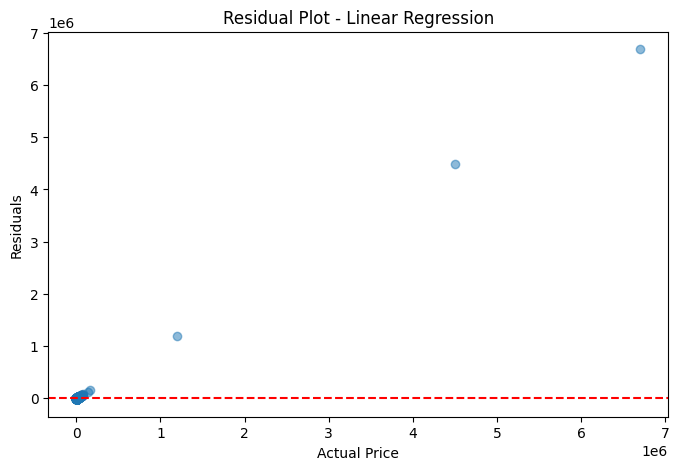

In [20]:
import matplotlib.pyplot as plt

# Example: using Linear Regression predictions
residuals = y_test - lr.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()


### Actual vs Predicted Plot

This scatter plot shows how close the predicted prices are to the actual prices. The red dashed line represents a perfect prediction line (where predicted = actual). Points closer to this line indicate better model performance.


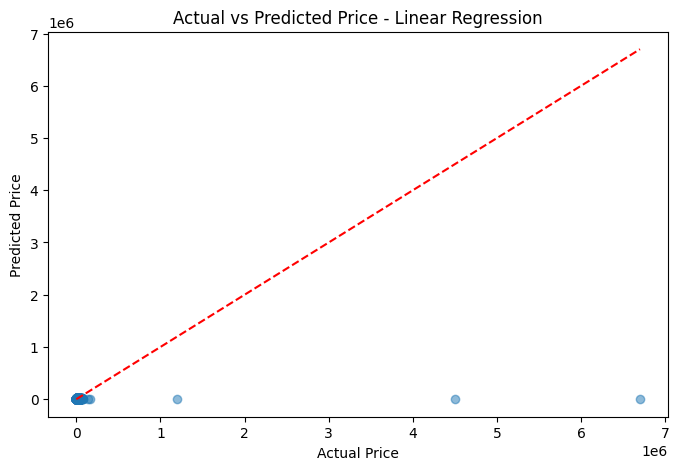

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price - Linear Regression")
plt.show()


### Error Distribution Plot

This histogram with KDE shows the distribution of model errors (residuals). A normal, centered distribution around zero indicates that the model is making unbiased predictions.


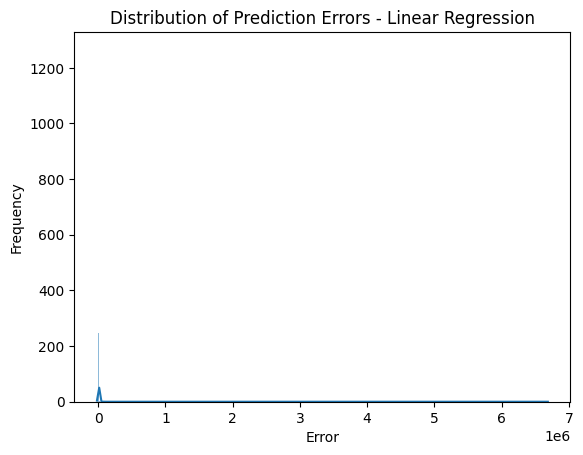

In [22]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors - Linear Regression")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


### Feature Importance Visualization - Lasso

The following bar chart presents the feature importance scores derived from the Lasso Regression model. These scores are based on the magnitude of coefficients assigned to each feature during training. A higher magnitude indicates a greater impact on house price prediction. This visual helps validate our hypotheses by showing whether features like Carpet Area and Bathroom rank among the top contributors.


<ipython-input-24-fd00c9954274>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')


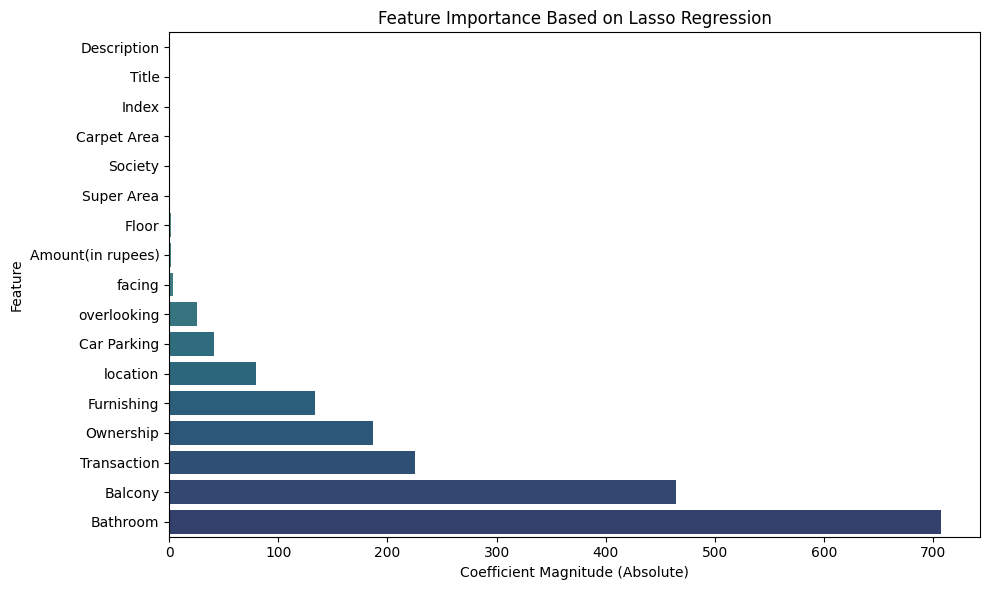

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct trained model variable — change 'lasso' if yours is different
coefficients = lasso.coef_    # Make sure lasso has already been fitted
features = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Take absolute value to show strength regardless of sign
importance_df['Importance'] = importance_df['Coefficient'].abs()

# Filter out zero coefficients (Lasso shrinks irrelevant ones to zero)
importance_df = importance_df[importance_df['Importance'] > 0]
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')
plt.title('Feature Importance Based on Lasso Regression')
plt.xlabel('Coefficient Magnitude (Absolute)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**RELOADING THE DATA TO GENERATE FEATURE IMPORTANCE - POLYNOMIAL REGRESSION**

In [10]:
# Check all variables in the environment
%whos DataFrame


No variables match your requested type.


In [11]:
# Try common names you've possibly used
try:
    print(df_final.head())
except:
    try:
        print(df_encoded.head())
    except:
        try:
            print(final_df.head())
        except:
            print("Can't locate your cleaned DataFrame. Please confirm the name.")


Can't locate your cleaned DataFrame. Please confirm the name.


In [18]:
from google.colab import files
uploaded = files.upload()


Saving house_prices.csv to house_prices.csv


In [19]:
import pandas as pd

# Confirm the filename is correct here:
df = pd.read_csv('house_prices.csv')
df.head()


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [20]:
import pandas as pd

# Confirm the filename is correct here:
df = pd.read_csv('house_prices.csv')
df.head()


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [21]:
import os
os.listdir()


['.config',
 'archive (5).zip',
 'house_prices.csv',
 'Lab 1 - Priyal Rawat.ipynb',
 'sample_data']

In [22]:
# Drop columns with more than 40% missing values
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


<ipython-input-22-ab8d3e17e3af>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-22-ab8d3e17e3af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-22-ab8d3e17e3af>:8: FutureWarning: A value is trying to be set on a copy

**Feature Importance Visualization - Polynomial Regression**

The following bar chart presents the feature importance scores derived from the Lasso Regression model. These scores are based on the magnitude of coefficients assigned to each feature during training. A higher magnitude indicates a greater impact on house price prediction. This visual helps validate our hypotheses by showing whether features like Carpet Area and Bathroom rank among the top contributors.

<ipython-input-23-433c8f9e0a08>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='mako')


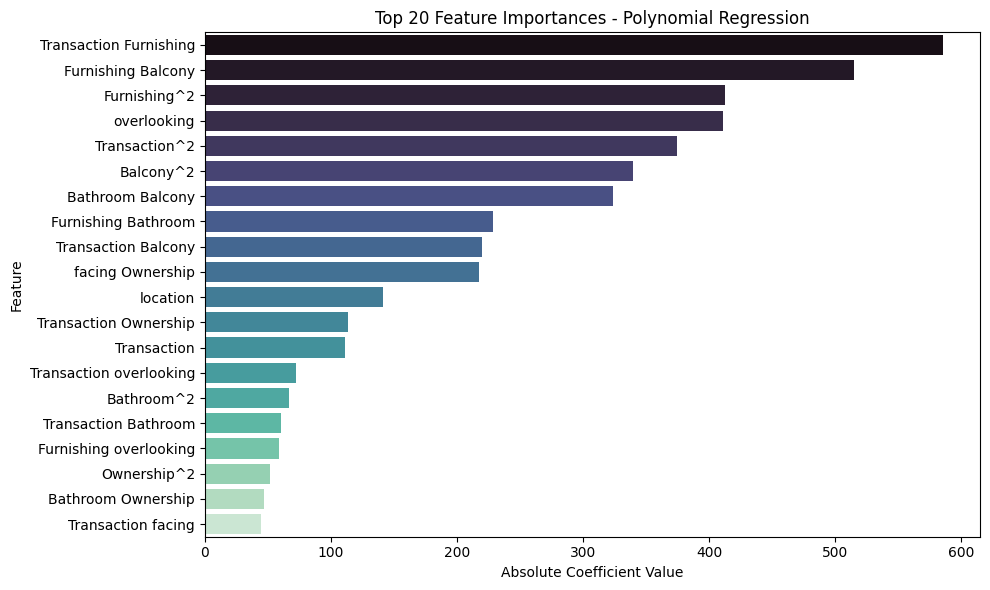

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define features and target
X = df.drop(columns=['Price (in rupees)'])
y = df['Price (in rupees)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Fit model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Get feature names and coefficients
feature_names = poly.get_feature_names_out(X.columns)
coefficients = model.coef_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
importance_df['Importance'] = importance_df['Coefficient'].abs()

# Select top 20 most important features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='mako')
plt.title('Top 20 Feature Importances - Polynomial Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
